In [134]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from IPython.display import display
import holoviews as hv


In [135]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [136]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [137]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [138]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)



In [139]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data
df_market_data_scaled["crypto_name"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled.set_index("crypto_name", inplace=True)

# Display sample data
print(df_market_data_scaled.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
crypto_name                                                                
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
crypto_nam

---

### Find the Best Value for k Using the Original Data.

In [140]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [141]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled)
    inertia_values.append(kmeans.inertia_)

c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

In [142]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled)
    elbow_data[k] = kmeans.inertia_

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(list(elbow_data.items()), columns=['k', 'inertia'])

c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

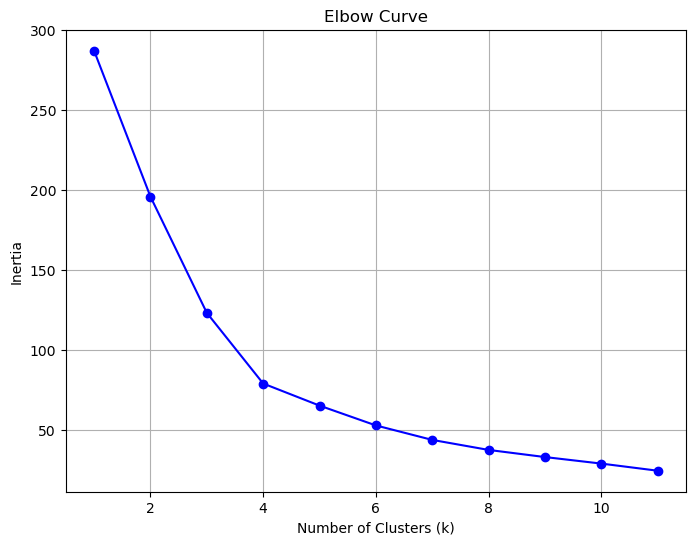

In [143]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [144]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [145]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_market_data_scaled)

c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [146]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.labels_
df_market_data["cluster"] = cluster_labels

# Print the resulting array of cluster values.
print(df_market_data.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [147]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()
print(cluster_labels)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [148]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_copy["cluster"] = cluster_labels

# Display sample data
print(df_market_data_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [149]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster",
    cmap="viridis",
    title="Cryptocurrency Price Change",
    xlabel="Price Change % (24h)",
    ylabel="Price Change % (7d)",
    hover_cols=["name"]
)


display(scatter_plot)

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [150]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [151]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_components = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame. 
print(df_market_data_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [152]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

print("Explained Variance for Each Principal Component:")
print(explained_variance)

total_explained_variance = sum(explained_variance)
print(total_explained_variance)


Explained Variance for Each Principal Component:
[0.3719856  0.34700813 0.17603793]
0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309841

In [153]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(data=pca_components, columns=["PC1", "PC2", "PC3"])

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
pca_df["Cryptocurrency"] = df_market_data.index

# Set the coinid column as index
pca_df.set_index("Cryptocurrency", inplace=True)

# Display sample data
print(pca_df.head())

                     PC1       PC2       PC3
Cryptocurrency                              
bitcoin        -0.600667  0.842760  0.461595
ethereum       -0.458261  0.458466  0.952877
tether         -0.433070 -0.168126 -0.641752
ripple         -0.471835 -0.222660 -0.479053
bitcoin-cash   -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [154]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [155]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    inertia_values.append(kmeans.inertia_)

# View the list of inertia values
print(inertia_values)

c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

[256.8740855678926, 168.8118963068523, 93.77462568057305, 49.66549665179739, 38.07279215014322, 27.618971787957452, 21.13405603747362, 17.016962140077435, 13.755814196780083, 10.48489048597693, 8.153175154624645]


In [156]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
print(elbow_df)

     k     inertia
0    1  256.874086
1    2  168.811896
2    3   93.774626
3    4   49.665497
4    5   38.072792
5    6   27.618972
6    7   21.134056
7    8   17.016962
8    9   13.755814
9   10   10.484890
10  11    8.153175


In [157]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve for K-Means Clustering',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=800,
    height=400,
    line_color='blue'
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [158]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k)

In [159]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [160]:
# Predict the clusters to group the cryptocurrencies using the PCA data
new_data_points = pca_df  
predicted_clusters = kmeans.predict(new_data_points)
# Print the resulting array of cluster values.
print(predicted_clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [161]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Predicted_Cluster'] = predicted_clusters

# Display sample data
print(pca_df_copy.head())

                     PC1       PC2       PC3  Predicted_Cluster
Cryptocurrency                                                 
bitcoin        -0.600667  0.842760  0.461595                  3
ethereum       -0.458261  0.458466  0.952877                  3
tether         -0.433070 -0.168126 -0.641752                  0
ripple         -0.471835 -0.222660 -0.479053                  0
bitcoin-cash   -1.157800  2.041209  1.859715                  3


In [162]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = pca_df_copy.hvplot.scatter(
    x="PC1", 
    y="PC2", 
    c="Predicted_Cluster", 
    colormap='viridis', 
    hover_cols=["Cryptocurrency"], 
    title="PCA Scatter Plot with Cluster Labels", 
    xlabel="Principal Component 1", 
    ylabel="Principal Component 2")

scatter_plot

:Scatter   [PC1]   (PC2,Predicted_Cluster,Cryptocurrency)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [163]:
# Composite plot to contrast the Elbow curves
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create empty lists to store the inertia values
inertia_values_original = []
inertia_values_pca = []

# Compute inertia values for the original data
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_market_data_scaled)
    inertia_values_original.append(kmeans.inertia_)

# Compute inertia values for the PCA data
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    inertia_values_pca.append(kmeans.inertia_)
    # Create DataFrames with the data for the Elbow curves
elbow_df_original = pd.DataFrame({'k': k_values, 'inertia': inertia_values_original})
elbow_df_pca = pd.DataFrame({'k': k_values, 'inertia': inertia_values_pca})

# Create composite plot to contrast the Elbow curves
composite_plot = (elbow_df_original.hvplot.line(x='k', y='inertia', title='Elbow Curve for Original Data', xlabel='Number of Clusters (k)', ylabel='Inertia', width=400, height=300) +
                 elbow_df_pca.hvplot.line(x='k', y='inertia', title='Elbow Curve for PCA Data', xlabel='Number of Clusters (k)', ylabel='Inertia', width=400, height=300))

hv.Layout(composite_plot).cols(1)

c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jeffi\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [164]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
scatter_original = df_market_data.hvplot.scatter(
x="price_change_percentage_24h", 
 y="price_change_percentage_7d", 
 c="Predicted_Cluster", 
 colormap="viridis", 
 hover_cols=["name"], 
 title="Cluster Analysis for Original Data", 
 xlabel="24h Price Change (%)", 
 ylabel="7d Price Change (%)")

scatter_pca = pca_df.hvplot.scatter(
    x="PC1", 
    y="PC2", 
    c="Predicted_Cluster", 
    colormap="viridis", 
    hover_cols=["Cryptocurrency"], 
    title="Cluster Analysis for PCA Data", 
    xlabel="Principal Component 1", 
    ylabel="Principal Component 2")

composite_plot_clusters = (scatter_original + scatter_pca).cols(2)

# Show the composite plot
composite_plot_clusters

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .Scatter.II :Scatter   [PC1]   (PC2,Cryptocurrency)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features through PCA simplifies K-Means clustering analysis and improves efficiency. It can lead to more distinct clusters and clearer visualization. However, reducing dimensions can result in some information being lost, affecting the accuracy of clustering results. 